# Lab 4.3: Central Limit Theorem

## Outline

- Central Limit Theorem Basics
- Central Limit Theorem Simulation
- Central Limit Theorem Application

### Central Limit Theorem Basics

**Question 1**  

1) What is the Central Limit Theorem? Explain it in your own words.
   

1) CLT states that as you increase the number of observations in your sample (from any population distribution), the sampling distribution begins to approximate the normal distribution.

2) What are the assumptions for the Central Limit Theorem?

2) The assumptions are that your data samples are identically and independently distributed. In addiiton, you need to have a "sufficiently large" sample (typically N>30).


### Central Limit Theorem Simulation

**Question 2**

Here we will write a function to show that the Central Limit Theorem applies to different distributions. 

1) Write a function `make_draws` which will make a number of draws from one of the following distributions, Possion, Binomial and Uniform. The function will take 3 arguments:
   - The name of the distribution as a string, e.g. `poisson`, `binomial` and `uniform`
   - The parameters associated with the distribution as a dictionary, for example `{'n': 30, 'p': 0.02}` for the binomial distribution 
   - The number of observations to be drawn in a sample  
   
   The function should return an array of values drawn from the specified distribution with the correct sample size.
   
   Below is an example for the binomial distribution
   
   ```python
   # import the stats module from scipy
   from scipy import stats

   def make_draws(distribution, parameters, size):
       if distribution == 'binomial':
           n, p = parameters['n'], parameters['p']
           dist = stats.binom(n, p).rvs(size)

       # Rest of the code
    ```
   

In [77]:
from scipy import stats

def make_draws(distribution_name,parameters,number_of_observations):
    """Make three distributions of n size from binomial, uniform, and poisson"""
    
    if distribution_name == 'poisson':
        
        l = parameters['lambda']
        
        poiss_dist = stats.poisson(l)
        
        return poiss_dist.rvs(size=number_of_observations)
        #pass
        
    elif distribution_name =='binomial':
        
        n,p=parameters['success_n'],parameters['prob_success']
        
        bin_dist = stats.binom(n,p)
        
        return bin_dist.rvs(size=number_of_observations)
        
        #pass
        
    elif distribution_name == 'uniform':

        low, high = parameters['low'],parameters['high']
        
        uni_dist = stats.uniform(low,high)
        return uni_dist.rvs(number_of_observations)
    
        #return uni_dist
    else:
        print("Your distribution is not in this function!")
        
    

In [78]:
#make_draws('uniform',{'low':1,'high':5},10)

#make_draws('binomial',{'success_n':10,'prob_success':.8},100)

make_draws('poisson',{'lambda':5},100)

array([ 4,  6,  4,  2,  5,  4,  2,  5,  4,  9,  3,  9,  6,  7,  6,  4,  3,
        7,  6,  8, 10,  4,  2,  3,  3,  3,  9, 11, 11,  6,  3,  4,  3,  4,
        1, 10,  3,  6,  6,  4,  8,  4,  6,  9,  4,  5,  5,  6,  7,  8,  5,
        8,  2,  2,  7,  4,  7,  5,  5,  3,  5,  6,  7,  4,  3,  9,  4,  5,
        8,  5,  6,  7,  8,  6,  7,  8,  9,  6,  7,  5,  7,  8,  4,  3,  5,
        6,  5,  5,  1,  6,  6,  7,  9,  2,  4,  8,  3,  7,  3,  4])

   
2) Write another function `plot_means` that would take the same arguments as `make_draws` plus an additional argument `repeats`
   - `plot_means` would repeatedly draw samples by calling `make_draws`, the number of times `make_draws` is called is speicified by `repeats`
   - The number of observations in each sample is specified by `size`
   - Then the mean of each sample is computed and plotted on a histogram
   
   Below is some starter code:
   
   ```python 
   def plot_means(distribution, parameters, size, repeats):
       # call make_draws for times specified by repeats
       # compute mean for each of the sample
       # plot histogram
   ```
   

In [97]:

import seaborn as sns
%pylab inline

def plot_means(distribution, parameters, size, repeats):
    #print(range(repeats))
    data = [make_draws(distribution,parameters,size).mean() for _ in range(repeats)]
    #data_means = [np.mean(item) for item in data]
    #print(data_means)
    sns.distplot(data,norm_hist=False)
    #plt.hist(data, normed = True)
    
    plt.title('Histogram of {} distribution with {} draws per sample and {} samples'.format(distribution,size, repeats))
    plt.ylabel('Density')
    plt.xlabel('Sample Mean')
    
    #print(data_means)

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


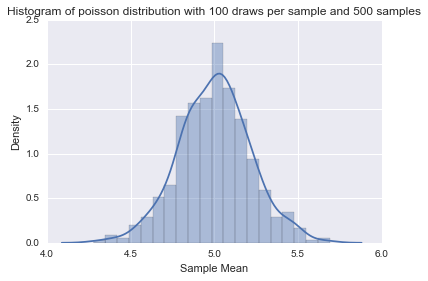

In [98]:
plot_means('poisson',{'lambda':5},100,500)

3) Call `plot_means` with each of the distribution (poisson, binomial, etc) with the following arguments:
   - `size`: 500 and `repeats`: 500
   - `size`: 10 and `repeats`: 500 
   
   For example, the histogram should look like the following if you call
   ```python
   plot_means('uniform', {'a': 1, 'b': 200}, 500, 500)
   plot_means('uniform', {'a': 1, 'b': 200}, 10, 500)
   ```
   
   ![image](images/unif_histogram.png)
   
   What do you observe? Under what condition does the Central Limit Theorem hold?

In [91]:
import numpy as np

In [93]:
np.__version__

'1.11.1'

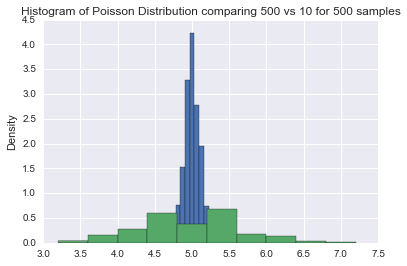

In [94]:
plot_means('poisson',{'lambda':5},500,500)
plot_means('poisson',{'lambda':5},10,500)
plt.title('Histogram of Poisson Distribution comparing 500 vs 10 for 500 samples');

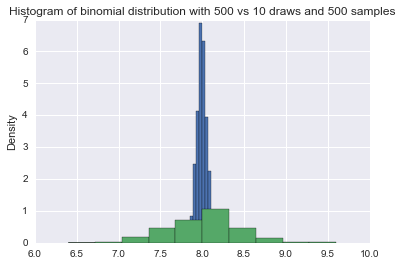

In [95]:

plot_means('binomial',{'success_n':10,'prob_success':.8},500,500)
plot_means('binomial',{'success_n':10,'prob_success':.8},10,500)
plt.title('Histogram of binomial distribution with 500 vs 10 draws and 500 samples');

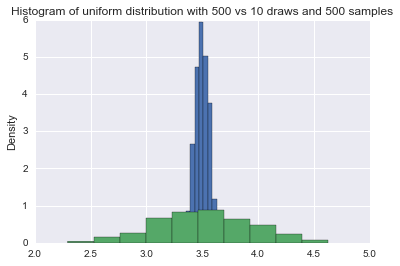

In [96]:
plot_means('uniform',{'low':1,'high':5},500,500)
plot_means('uniform',{'low':1,'high':5},10,500)
plt.title('Histogram of uniform distribution with 500 vs 10 draws and 500 samples');

### Central Limit Theorem Application

**Question 3**

1) It is known that the amount that a person spends on a single trip to a grocery store follows a distribution with mean of \$3.70 and standard deviation of \$1.52.

   A random sample of 50 people's spendings is collected. 
   
   What is the probability that the mean spending of the 50 people exceeds $4?


In [112]:
from math import sqrt
s_e = 1.52/sqrt(50)
s_e

norm_d = stats.norm(3.7,s_e)

(1-norm_d.cdf(4))

0.081416664277620843

### About 8.1% 

2) From past experience, it is known that, at the ticket counter for the football match of Stanford against Berkeley,  the number of tickets purchased by each student follows a distribution that has mean $\mu$ = 2.4 and standard deviation $\sigma$ = 2.0.

   Suppose that a few hours before the start of one of these matches, there are 100 eager students standing in line to purchase tickets. If only 250 tickets remain, what is the probability that all 100 students will be able to purchase the tickets they desire?

In [113]:
stand_error = 2/sqrt(100)

In [117]:
normal_d = stats.norm(2.4,stand_error)


In [118]:
normal_d.cdf(2.5)

0.69146246127401323

In [120]:
mean = 2.4
std = 2.0
n = 100
1-stats.norm(mean,std/math.sqrt(n)).cdf(250/n)

0.30853753872598677

### Extra Practice  
(Optional)

1) Create your own distribution. It can be any distribution as long as it is a valid probability distribution. Refer to the `custom` distribution we created in the lecture.

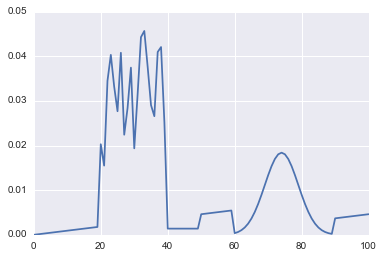

In [121]:
def normalize(v):
    norm = float(linalg.norm(v,ord=1))
    if norm == 0:
        return v
    return array(v)/norm

x_vals = linspace(0,100,101)
y_vals = []
norm = stats.norm(loc=0, scale=1)
mid_range = linspace(-3, 3, 31)
random.seed(42)
rands = random.randint(5, 20, 20)

for i in range(101):
    if i < 20:
        y_vals.append(i)
    elif i < 40:
        random.seed(42)
        y_vals.append(i*rands[i-20])
    elif i < 50:
        y_vals.append(15)
    elif i < 60:
        y_vals.append(i)
    elif i < 90:
        y_vals.append(500 * norm.pdf(mid_range[i-59]))
    else:
        y_vals.append(i-50)

y_vals = normalize(y_vals)
custom = stats.rv_discrete(values=(x_vals, y_vals))
plot(x_vals, custom.pmf(x_vals));

2) Draw 10000 samples from the distribution above with the following sample sizes. Calculate and plot the sample means for each sample size. What do you notice from the 3 plots?

    * n = 10
    * n = 100
    * n = 1000

3) Fit a Normal distribution to the 3 sets of samples means from part 2). Then plot the Normal distribution on top of the histogram of the means.  

4) Estimate the Standard Error of the Mean (SEM calculation in the lecture) for each of the 3 sample means. What do you notice? How does the SEM change as the sample size changes?